# IMPORT LIBRARIES AND DATASETS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
Kyphosis_df = pd.read_csv('kyphosis.csv')

In [11]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [12]:
Kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [13]:
Kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


**List the average, minimum and maximum age (in years) considered in this study using two different methods**

In [14]:
Kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


# PERFORM DATA VISUALIZATION

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
Kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(Kyphosis_df['Kyphosis'])

In [17]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [18]:
Kyphosis_True = Kyphosis_df[Kyphosis_df['Kyphosis']==1]

In [19]:
Kyphosis_False = Kyphosis_df[Kyphosis_df['Kyphosis']==0]

In [20]:
print( 'Disease present after operation percentage =', (len(Kyphosis_True) / len(Kyphosis_df) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


<Axes: >

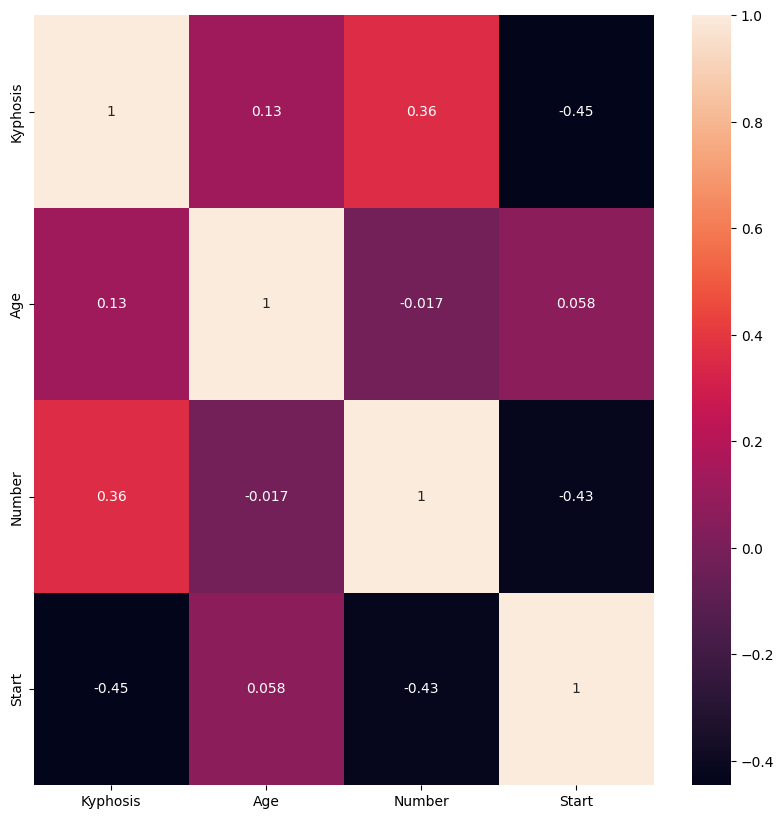

In [22]:
plt.figure(figsize=(10,10)) 
sns.heatmap(Kyphosis_df.corr(), annot=True)

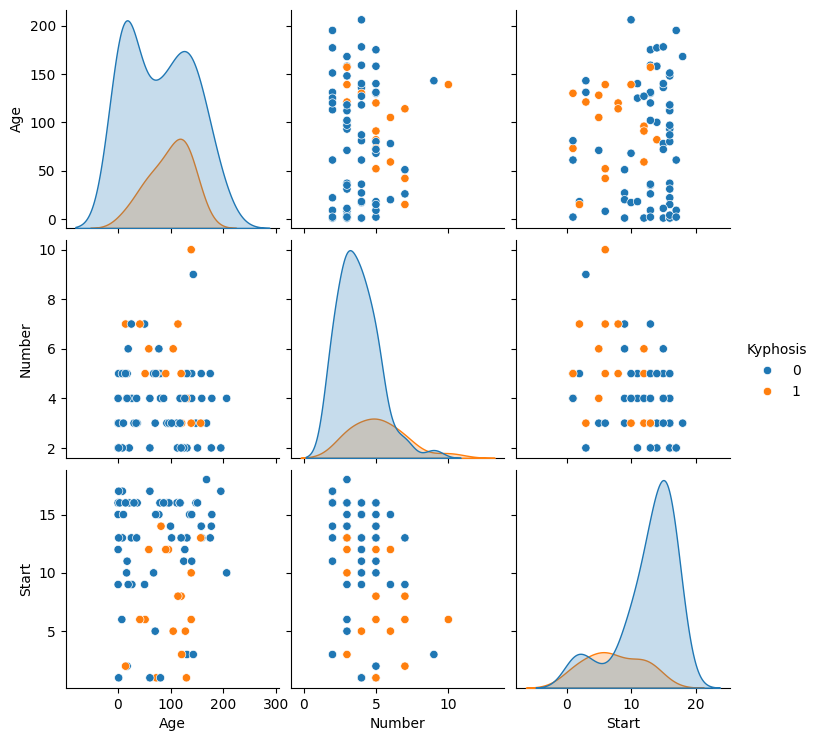

In [26]:
sns.pairplot(Kyphosis_df, hue='Kyphosis')

**Plot the data countplot showing how many samples belong to each class**

C:\Users\rupin\AppData\Local\Temp\ipykernel_19868\2308517911.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Kyphosis_df['Kyphosis'], palette='Set1')


<Axes: xlabel='Kyphosis', ylabel='count'>

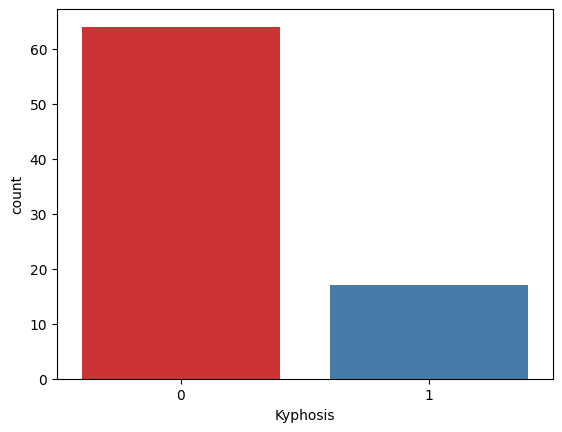

In [29]:
sns.countplot(x=Kyphosis_df['Kyphosis'], palette='Set1')

# CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [30]:
# Let's drop the target label coloumns
X = Kyphosis_df.drop(['Kyphosis'], axis=1)
Y = Kyphosis_df['Kyphosis']

In [31]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [32]:
Y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [35]:
X_train.shape

(64, 3)

In [36]:
X_test.shape

(17, 3)

In [37]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


# TRAIN A LOGISTIC REGRESSION CLASSIFIER MODEL

In [38]:
X_train.shape

(64, 3)

In [39]:
Y_train.shape

(64,)

In [40]:
X_test.shape

(17, 3)

In [41]:
Y_test.shape

(17,)

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

# EVALUATE TRAINED MODEL PERFORMANCE 

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

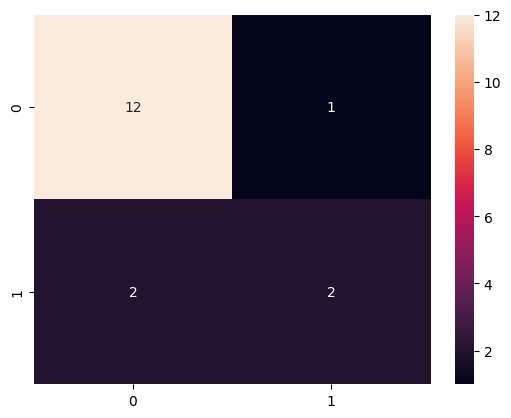

In [44]:
# Predicting the Test set results
y_predict_test = model.predict(X_test)
cm = confusion_matrix(Y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [45]:
print(classification_report(Y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.67      0.50      0.57         4

    accuracy                           0.82        17
   macro avg       0.76      0.71      0.73        17
weighted avg       0.81      0.82      0.81        17



# IMPROVE THE MODEL USING DECISION TREES 

In [46]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

<Axes: >

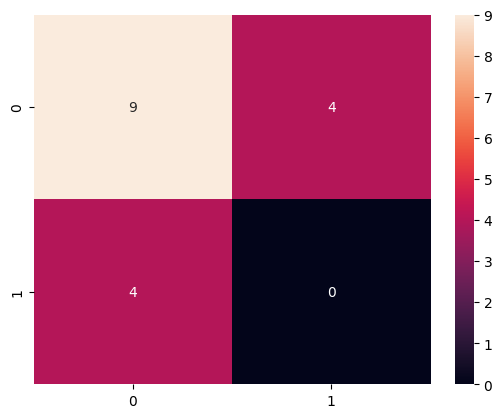

In [47]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(Y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [48]:
print(classification_report(Y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.00      0.00      0.00         4

    accuracy                           0.53        17
   macro avg       0.35      0.35      0.35        17
weighted avg       0.53      0.53      0.53        17



In [49]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

        importance
Start     0.495898
Age       0.431631
Number    0.072471


**Train a random forest classifier model and assess its performance**
**Plot the confusion matrix**
**Print the classification Report**

In [50]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, Y_train)

RandomForestClassifier()

<Axes: >

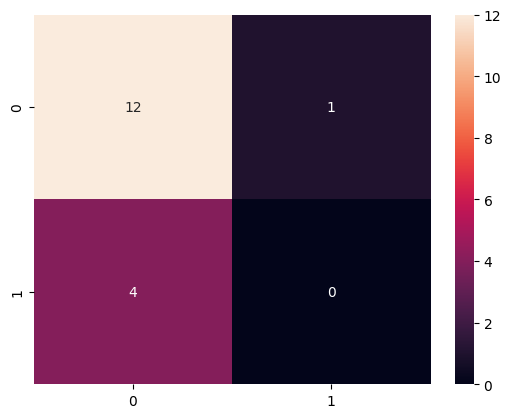

In [51]:
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(Y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [52]:
print(classification_report(Y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.00      0.00      0.00         4

    accuracy                           0.71        17
   macro avg       0.38      0.46      0.41        17
weighted avg       0.57      0.71      0.63        17

